In [0]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

In [0]:
X, y = load_planar_dataset()

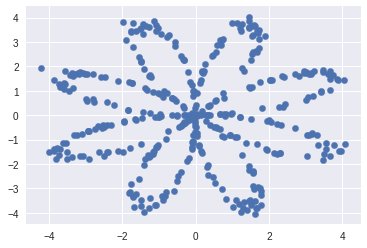

In [138]:
plt.scatter(X[0, :], X[1, :], s = 40, cmap=plt.cm.Spectral);

In [0]:
def initialize(n_units):
  
  parameter = {}
  
  W1 = np.random.rand(n_units[1], n_units[0])*0.01
  b1 = 0
  
  W2 = np.random.rand(n_units[2], n_units[1])*0.01
  b2 = 0
  
  parameter['W1'] = W1
  parameter['b1'] = b1
  parameter['W2'] = W2
  parameter['b2'] = b2
  
  return parameter

  
def forward_propagation(X, parameter):
  
  forward = {}
 
  W1, b1, W2, b2 = parameter['W1'], parameter['b1'], parameter['W2'], parameter['b2']
  
  Z1 = np.dot(W1, X) + b1
  A1 = np.tanh(Z1)
  
  Z2 = np.dot(W2, A1) + b2
  A2 = sigmoid(Z2)
  
  
  forward['A1'] = A1
  forward['A2'] = A2
  forward['Z1'] = Z1
  forward['Z2'] = Z2
  
  return forward


def backward_propagation(X, y, forward, parameter):
  
  backward = {}
  
  A1, A2, W2, Z1 = forward['A1'], forward['A2'], parameter['W2'], forward['Z1']
  m = X.shape[1]
  
  dZ2 = A2 - y
  dW2 = np.dot(dZ2, A1.T) / m
  db2 = np.sum(dZ2, keepdims = True, axis = 1) / m
  
  dZ1 = np.dot(W2.T, dZ2) * ((1 - Z1)**2)
  dW1 = np.dot(dZ1, X.T) / m
  db1 = np.sum(dZ1, keepdims = True, axis = 1) / m
  
  backward['dZ1'] = dZ1
  backward['dW1'] = dW1
  backward['db1'] = db1
  backward['dZ2'] = dZ2
  backward['dW2'] = dW2
  backward['db2'] = db2
  
  return backward


def update(parameter, backward, learning_rate):
  
  W1, b1, W2, b2     = parameter['W1'],   parameter['b1'],   parameter['W2'],   parameter['b2']
  dW1, db1, dW2, db2 = backward['dW1'], backward['db1'], backward['dW2'], backward['db2']
  
  W1 = W1 - learning_rate * dW1
  b1 = b1 - learning_rate * db1
  
  W2 = W2 - learning_rate * dW2
  b2 = b2 - learning_rate * db2
  
  
  parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
  
  return parameter

def model(X, y, number_of_iterations, learning_rate):
  
  parameter = initialize([2, 4, 1])
  #W1, b1, W2, b2 = parameter['W1'],   parameter['b1'],   parameter['W2'],   parameter['b2']
  
  for i in range(0, number_of_iterations):
      
      forward = forward_propagation(X, parameter)
      A1, b1, W1, A2, b2, W2 = forward['A1'], parameter['b1'], parameter['W1'], forward['A2'], parameter['b2'], parameter['W2']

      backward = backward_propagation(X, y, forward, parameter)
      dW1, db1, dW2, db2 = backward['dW1'], backward['db1'], backward['dW2'], backward['db2']

      parameter = update(parameter, backward, learning_rate)
      
      if(i % 10000 == 0):
        print(str(i)+'th epoch Completed')  
    
    
  return parameter   

parameter = model(X, y, 50000, 0.2) 
forward = forward_propagation(X, parameter)
A2 = forward['A2']
y_predict = 1 * (A2 > 0.50)
print ('Accuracy: %d' % float((np.dot(y,y_predict.T) + np.dot(1-y,1-y_predict.T))/float(y.size)*100) + '%')